<h3>Directions</h3>

Choose one variable and plot that variable four different ways.

Choose two continuous variables, and plot them three different ways.
Choose one continuous variable and one categorical variable, and plot them six different ways.

Give the pros and cons of each plot you create. You can use variables from multiple datasets if you like.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [77]:
olym = pd.read_csv('datasets/athlete_events.csv')

medalists= olym.loc[(olym['Medal']=='Gold') | (olym['Medal']=='Silver') | (olym['Medal']=='Bronze')]

medalists.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


<h3>Age of Olympians by Season</h3>

I want to see if age has any type of relation with the seaon. By plotting these as a histogram, you are able to see the relation, but the way that the data skews toward males makes it hard to pull too many insights. What you can see is that the average age of women in the summer games is definitely the lowest.

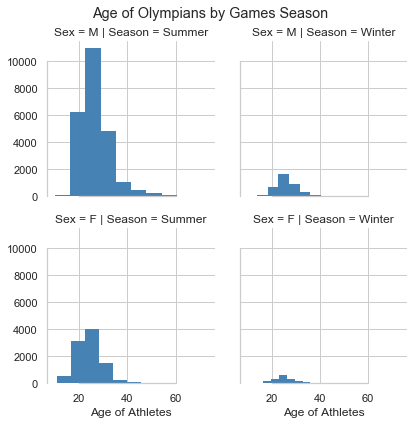

In [78]:
# Tell seaborn about the structure of our data.
g = sns.FacetGrid(medalists, row="Sex", col="Season")
# Name the plot type and the variable to be plotted using the structure.
g.map(plt.hist, "Age", color="steelblue",  lw=0)
# Moving the plots apart to make room for our titles.
plt.subplots_adjust(top=.9)
# Making a more informative axis name.
g.set_axis_labels('Age of Athletes')
plt.suptitle('Age of Olympians by Games Season')
# Removing excess lines around the plot.
sns.despine(trim=True)
plt.show()

<h3>Into a catplot</h3>

Here, I've taken the age and placed it into a strip plot. First I wanted to look at all Male & Female ages, then break it up by games. When looking at all of them, you can see that Men tend to be older but the low end of both sexes tends to be similar. When you separate them out, it is interesting how the winter games have had much younger athletes.

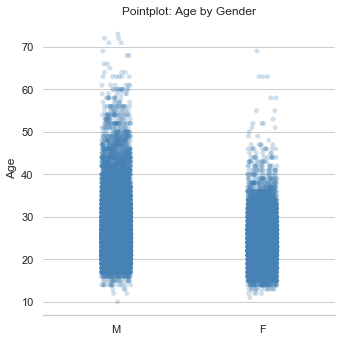

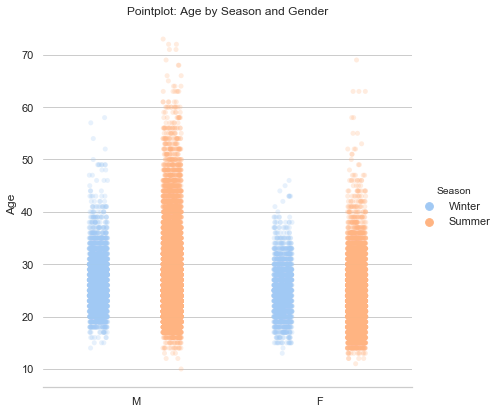

In [122]:
sns.set(style="whitegrid")

g = sns.catplot(x="Sex", y="Age", data=medalists, kind="strip", color='steelblue', 
                ci=95,dodge=True, jitter=True, alpha=.25)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Pointplot: Age by Gender')
plt.show()


g = sns.catplot(x="Sex", y="Age", hue="Season", data=medalists, hue_order=['Winter', 'Summer'],
                   height=6, kind="strip", palette="pastel",ci=95,dodge=True, jitter=True, alpha=.25)
g.despine(left=True)
g.set_ylabels("Age")
g.set_xlabels("")
plt.title('Pointplot: Age by Season and Gender')
plt.show()

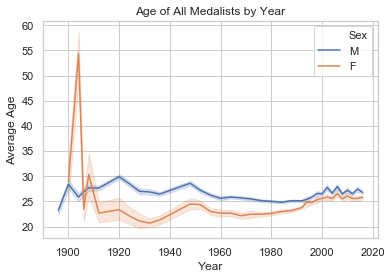

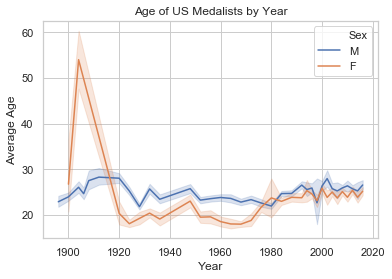

In [89]:
g= sns.lineplot(x='Year', y='Age', hue="Sex", data=medalists)
g.set_ylabel('Average Age')
g.set_xlabel('Year')
g.set_title('Age of All Medalists by Year')
plt.show()

us_medals = medalists.loc[medalists['Team']=='United States']

g= sns.lineplot(x='Year', y='Age', hue="Sex", data=us_medals)
g.set_ylabel('Average Age')
g.set_xlabel('Year')
g.set_title('Age of US Medalists by Year')
plt.show()

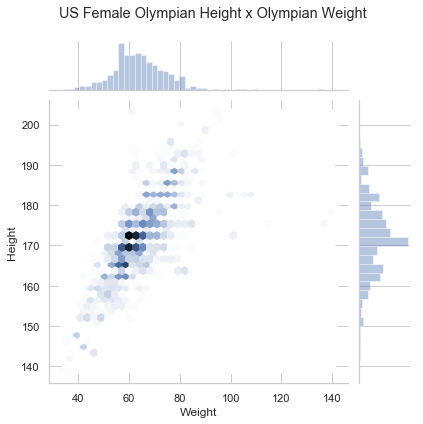

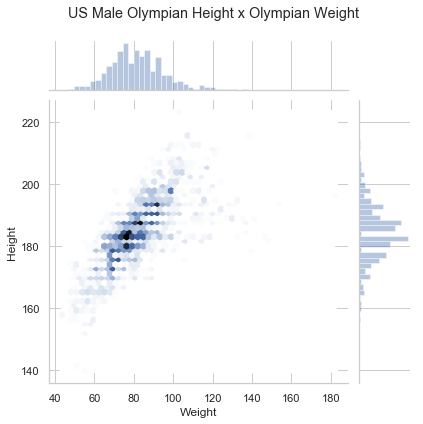

In [114]:
f_us_medals = us_medals.loc[us_medals['Sex']=='F']
m_us_medals = us_medals.loc[us_medals['Sex']=='M']

g =sns.jointplot(x='Weight', y='Height', data=f_us_medals, kind="hex")
plt.subplots_adjust(top=.9)
g.fig.suptitle('US Female Olympian Height x Olympian Weight')
plt.show()

g =sns.jointplot(x='Weight', y='Height', data=m_us_medals, kind="hex")
plt.subplots_adjust(top=.9)
g.fig.suptitle('US Male Olympian Height x Olympian Weight')
plt.show()

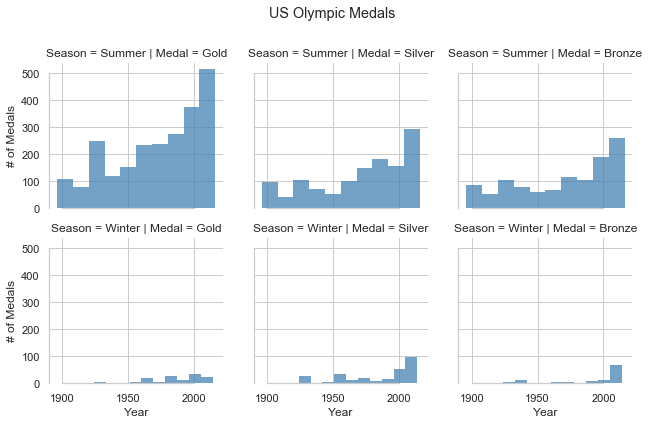

In [117]:
g = sns.FacetGrid(us_medals, row="Season", col="Medal", legend_out=True, col_order=['Gold', 'Silver', 'Bronze'] )

g.map(plt.hist, "Year", color="steelblue",  lw=0, alpha=.75)

plt.subplots_adjust(top=.85)
g.set_axis_labels('Year', '# of Medals')
g.fig.suptitle('US Olympic Medals')
sns.despine(trim=True)
plt.show()

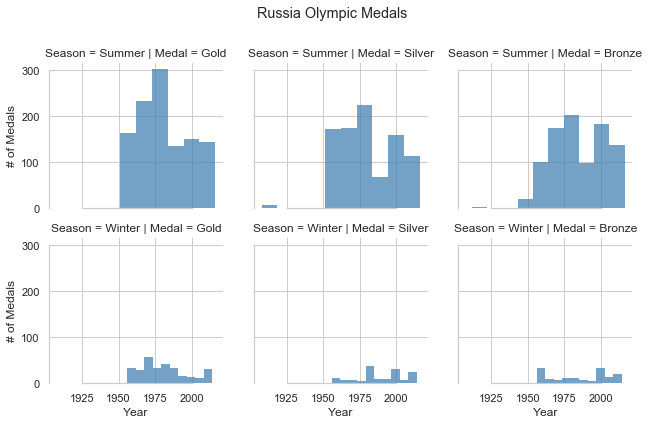

In [76]:
russia_medals = medalists.loc[(medalists['Team']=='Russia') | (medalists['Team']=='Soviet Union')]

g = sns.FacetGrid(russia_medals, row="Season", col="Medal", legend_out=True, 
                  col_order=['Gold', 'Silver', 'Bronze'], row_order=['Summer', 'Winter'])

g.map(plt.hist, "Year", color="steelblue",  lw=0, alpha=.75)

plt.subplots_adjust(top=.85)
g.set_axis_labels('Year', '# of Medals')
g.fig.suptitle('Russia Olympic Medals')
sns.despine(trim=True)
plt.show()